In [122]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [123]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [124]:
x_train.shape

(60000, 28, 28)

In [125]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [126]:
x_train[69].shape

(28, 28, 1)

In [127]:
y_train[69]

1

In [128]:
from tensorflow.keras.utils import to_categorical

In [129]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

讀入所需的函數

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

打造CNN

In [131]:
model = Sequential()

做三層channel    filter改成12,24,48

In [132]:
model.add(Conv2D(12, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [133]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [134]:
model.add(Conv2D(24, (3,3), padding='same',
                activation='relu'))

In [135]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [136]:
model.add(Conv2D(48, (3,3), padding='same',
                activation='relu'))

In [137]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [138]:
model.add(Flatten())

建立兩層Dense,神經元設為30,10

In [139]:
model.add(Dense(30, activation='relu'))

In [140]:
model.add(Dense(10, activation='softmax'))

In [141]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 12)        120       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 24)        2616      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 24)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 48)          10416     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 48)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 432)              

把學習率改為0.088

In [142]:
model.compile(loss='mse', optimizer=SGD(lr=0.088),
             metrics=['accuracy'])

fit 
batch_size為120, 訓練次數為20次

In [143]:
model.fit(x_train, y_train, batch_size=120, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 56s 937us/sample - loss: 0.0893 - accuracy: 0.1432
Epoch 2/20
60000/60000 [==============================] - 56s 933us/sample - loss: 0.0833 - accuracy: 0.3706
Epoch 3/20
60000/60000 [==============================] - 55s 912us/sample - loss: 0.0513 - accuracy: 0.6377
Epoch 4/20
60000/60000 [==============================] - 56s 926us/sample - loss: 0.0407 - accuracy: 0.7003
Epoch 5/20
60000/60000 [==============================] - 55s 925us/sample - loss: 0.0369 - accuracy: 0.7329
Epoch 6/20
60000/60000 [==============================] - 56s 930us/sample - loss: 0.0345 - accuracy: 0.7509
Epoch 7/20
60000/60000 [==============================] - 55s 915us/sample - loss: 0.0327 - accuracy: 0.7666
Epoch 8/20
60000/60000 [==============================] - 55s 923us/sample - loss: 0.0312 - accuracy: 0.7789
Epoch 9/20
60000/60000 [==============================] - 55s 915us/sample - loss: 0.0301 - accuracy: 0.7

預測  將圖形顏色調成紫色

In [144]:
result = model.predict_classes(x_test)

In [162]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def my_predict(n):
    print('CNN 預測說是', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Purples')

CNN 預測說是 Pullover


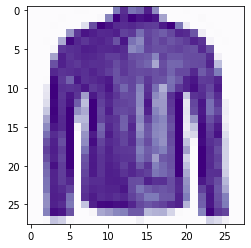

In [163]:
my_predict(50)

In [165]:
from ipywidgets import interact_manual

In [166]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [167]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 368us/sample - loss: 0.0234 - accuracy: 0.8388


In [168]:
loss, acc = score

In [169]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8388


把MODEL存起來

In [170]:
model.save('myCNNmodel.h5')